<font size="-1">FALL 2022
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="60px" align="right">
 </br>
<font size="-01">CIE 457, Statistical inference and data analysisCity</font>

<font size="-1">University of Science and Technology, Zewail City</font>

<br>

<h1 align="center">Assignment 3: </h1>
<h2 align="center">Method of moments estimation</h2>

---


<br> <br> <br>

#**Question One**

**<font color='green'>[2pt]</font>**$\;\;\;$Q1: <font color='gskyblue'><
pen and paper ></font> Derive the method of moments estimators for the two parameters **$n$** nd **$p$** of a binomial distribution:

<h2 align='center'> $f(x;n,p)={n \choose x}$ $p^x (1-p)^{n-x}$</h2>

given N iid samples {$x_1, x_2,..., x_N$}. Show your steps.

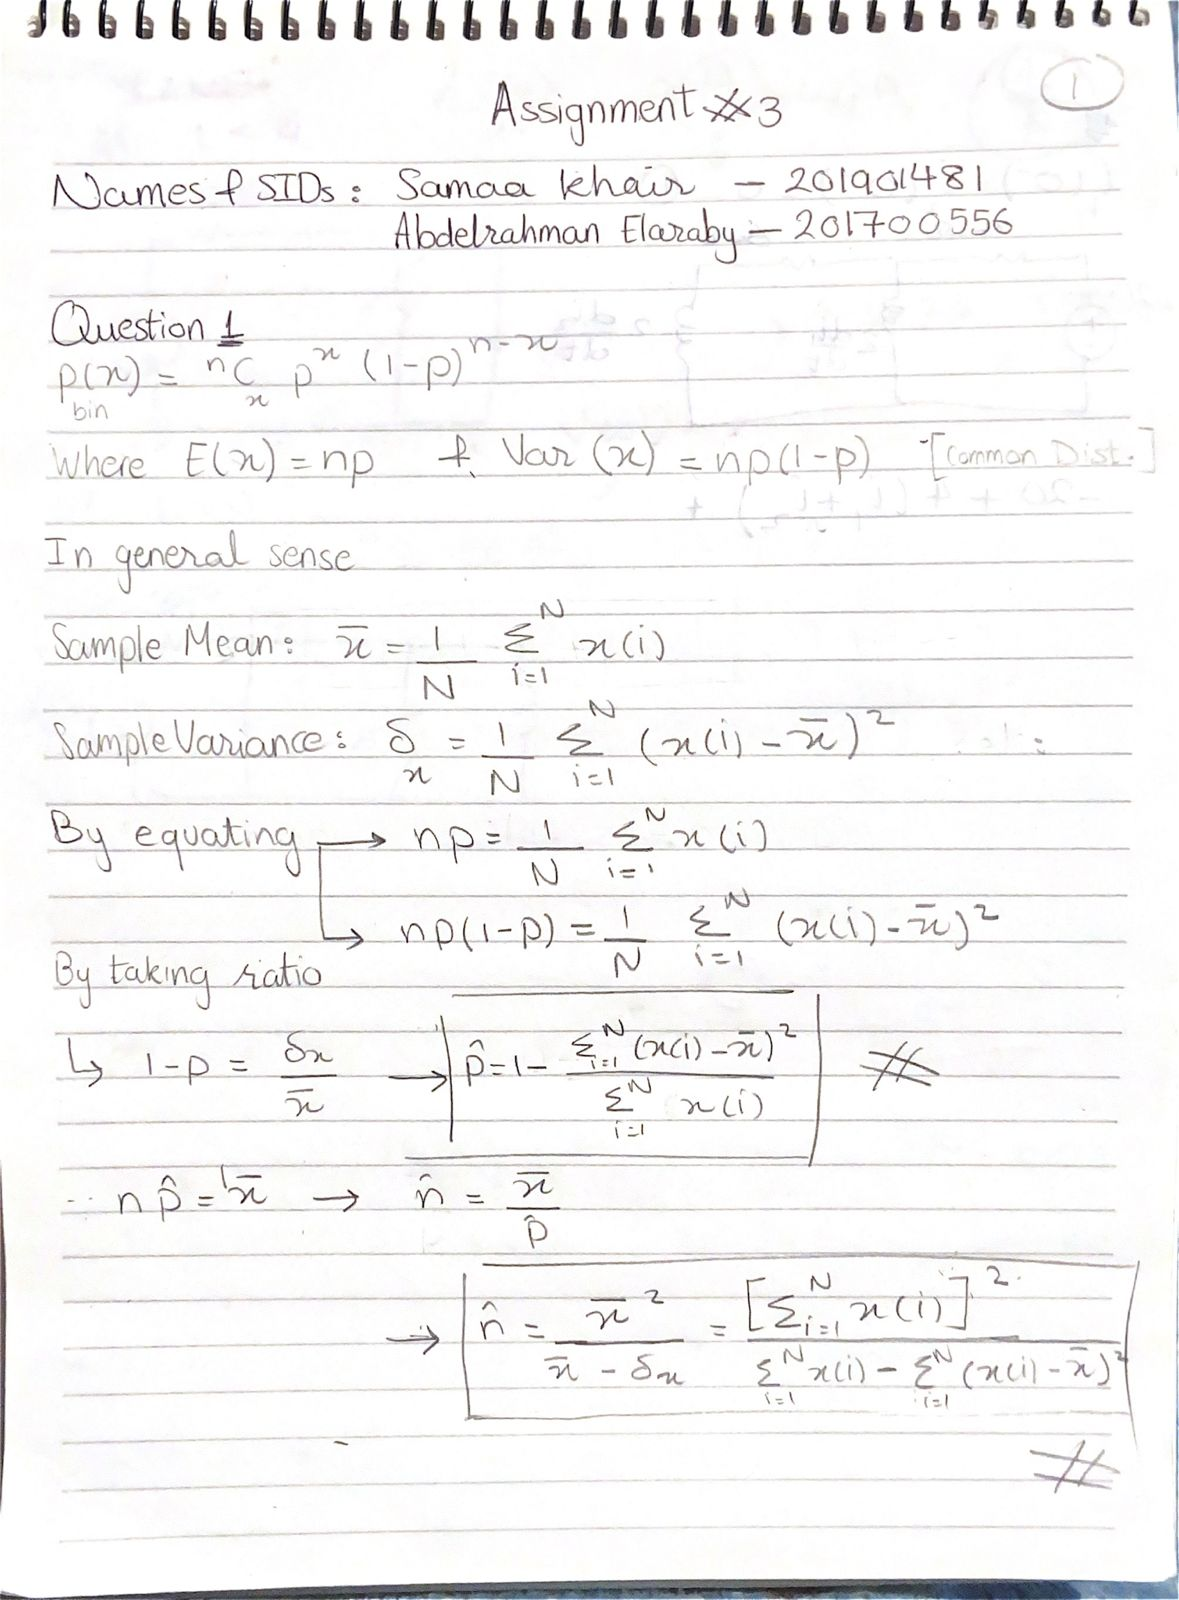<center><font color='gskyblue' size=4>* <ins>Upload or write your answer.</font>

#**Question Two**

---
**<font color='green'>[2pt]</font>**$\;\;\;$Q2: <font color='gskyblue'>< code ></font> Write two functions `estimate_p(X)`, and `estimate_n(X)` where the input **X** is a sample of N data points stored in a list or an array. The functions should implement the estimator equations you derived in question 1, and return the estimated $\hat{p}$, or $\hat{n}$ respectively.

In [ ]:
import numpy as np

In [ ]:
def estimate_p(X):
    X= np.array(X)
    p_hat=1-(np.var(X)/np.mean(X))
    return p_hat

def estimate_n(X):
     X= np.array(X)
     n_hat=((np.mean(X))**2/(np.mean(X)-np.var(X)))
     return n_hat

#**Question Three**

 ---

<font size=-0.5> **<font color='green'>[3pt]</font>**$\;\;\;$Q3: <font color='gskyblue'>< code ></font> Assuming the true parameters are $p=0.3$, and $n=300$, conduct a repeated sampling simulation (monte carlo simulation) with **1000** repititions and varying sample sizes N, drawn from the binomial distribution $Bin(300, 0.3)$. Plot the sampling distributions of sample $\hat{p}$, and $\hat{n}$ estimates for sample sizes N=3, N=10, N=50, N=100, N=1000, and N= 10000. This is very similar to what we did in lab 5.

- Based on your observation, what happens to the sampling distributions of $\hat{p}$, and $\hat{n}$ when varying the sample size N?

In [ ]:
import numpy.random
import scipy.stats as ss
import matplotlib.pyplot as plt

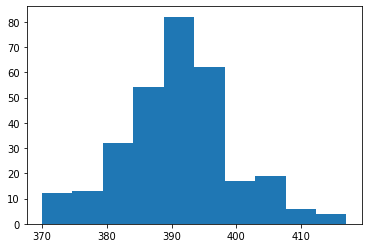

In [ ]:
#Sanity Check
n = 300
p = 0.3
# defining list of x values
x_values = list(range(n+1))
# list of pmf values
dist = [ss.binom.rvs(n, p, len(x_values)) for x in x_values ] #distribution
# plotting the graph
plt.hist(dist)
plt.show()

In [ ]:
# the monte carlo simulator

""" this function implements a monte carlo simulation where repeated samples
    of size N are taken from the theoretical population's distributionand the
    sample distribution of epsilon is plotted.

    estimator_function: a function handle to the estimator equation function
    sample_size: the size N of each randomly selected sample
    num_samples: the number of times the sampling experiment is repeated

"""
def sample_distribution_of_estimator(estimator_function, sample_size, num_samples, ax):
    n = 300
    p = 0.3
    N = sample_size
    SAMPLES = [ss.binom.rvs(n, p, size=N) for _ in range(num_samples)]
    sample_estimates = [ estimator_function(sample) for sample in SAMPLES]

    # ploting the histogram of sample epsilons
    ax.hist(sample_estimates, density=True, bins=300,)  # density=False would make counts
    ax.set_ylabel('Probability')
    ax.set_xlabel('Sample estimates')
    ax.set_title(f'number of samples = {num_samples}, sample size= {sample_size} ')
    # calculating the mean and variance
    ax.text(0.8, 0.65, f'variance = {np.var(sample_estimates)}', horizontalalignment='center',\
            verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
    ax.text(0.8, 0.75, f'mean = {np.mean(sample_estimates)}', horizontalalignment='center',\
            verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))


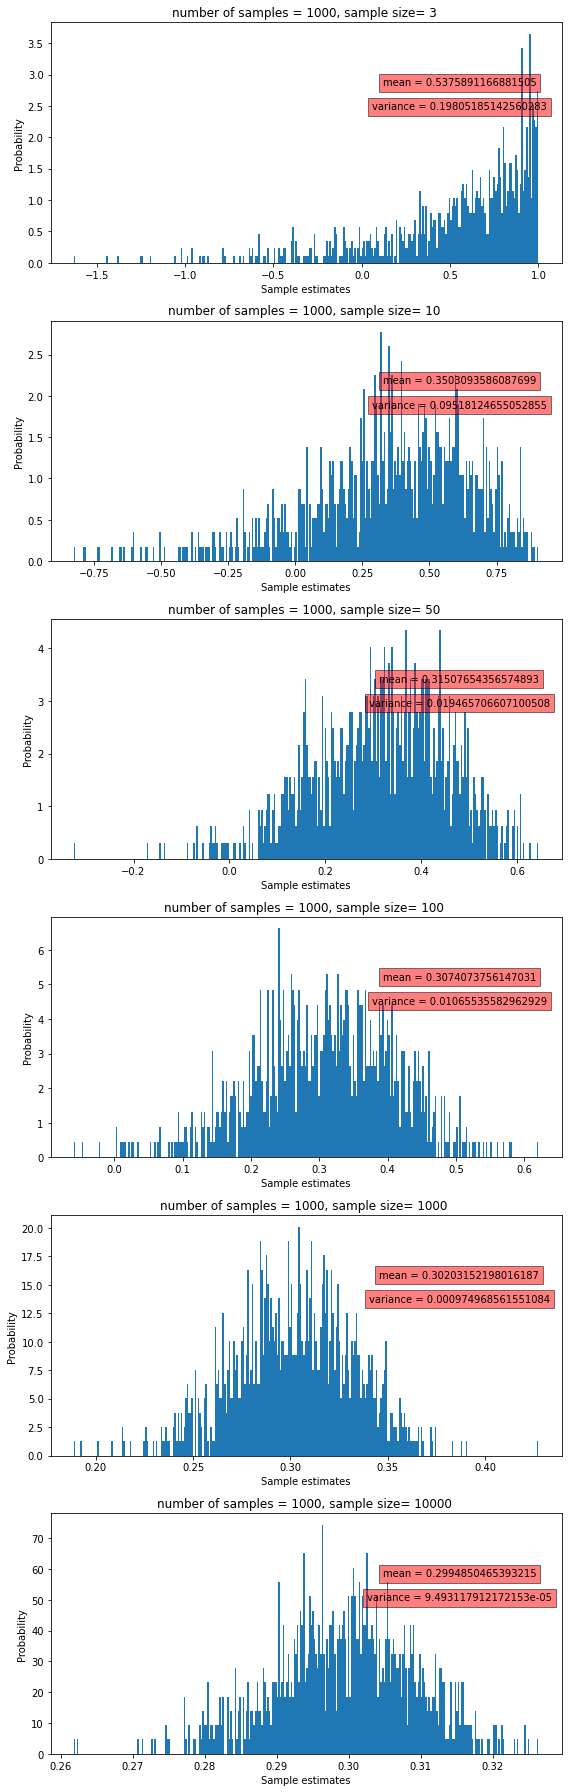

In [ ]:
# Running the simulation on THE MoM estimator to plot the sampling distributions
# for different sample sizes

fig, axs = plt.subplots(6,figsize = (8,25), tight_layout = True)

for i, sample_size in enumerate([3,10,50,100,1000,10000]):
  sample_distribution_of_estimator(estimate_p, sample_size, 1000, axs[i])

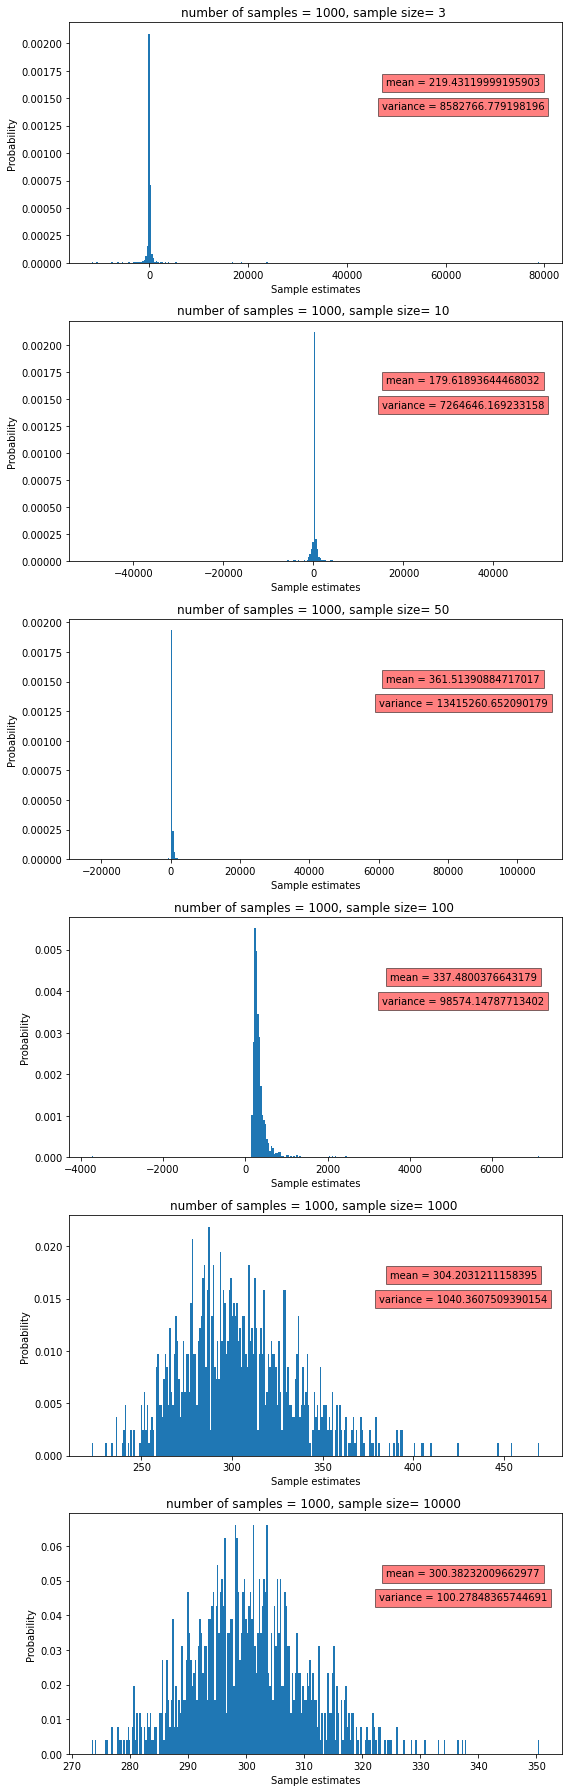

In [ ]:
# Running the simulation on THE MoM estimator to plot the sampling distributions
# for different sample sizes

fig, axs = plt.subplots(6,figsize = (8,25), tight_layout = True)

for i, sample_size in enumerate([3,10,50,100,1000,10000]):
  sample_distribution_of_estimator(estimate_n, sample_size, 1000, axs[i])

#**Question Four**

<font size=-0.5> **<font color='green'>[3pt]</font>**$\;\;\;$Q4:  <font color='gskyblue'>< code ></font> A possible different estimator for the propability of success P is:
<h2><center>$\hat{p} = \frac{\bar{X}^2 (x_m - \bar{X})}{x_m^2 \bar{M_2^*}}$ </center>

where $\bar{X}$ is the sample mean, $\bar{M_2^*}$ the sample variance (second central moment), and $x_m$ is the sample maximum.

* Implement this new estimator.
* Repeat the same monte carlo simulation you did in Q3 using this new estimator.
*  compare the performance of this estimator to the one you derived using MoM in terms of : Bias, Variance, and consistency.

In [ ]:
def another_estimator_of_P(X):
   X= np.array(X)
   p_hat=(np.mean(X)**2*(max(X)-np.mean(X)))/(max(X)**2*np.var(X))
   return p_hat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


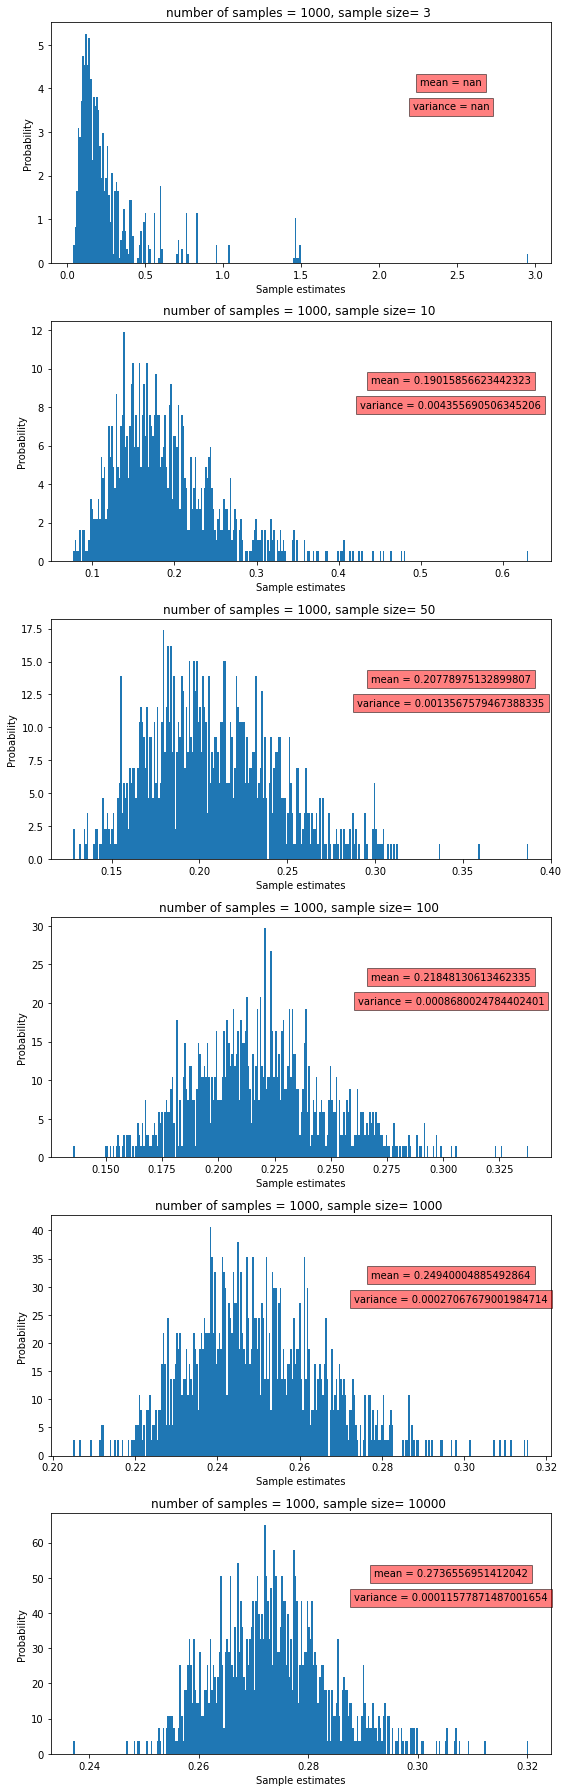

In [ ]:
fig, axs = plt.subplots(6,figsize = (8,25), tight_layout = True)

for i, sample_size in enumerate([3,10,50,100,1000,10000]):
  sample_distribution_of_estimator(another_estimator_of_P, sample_size, 1000, axs[i])

#**Analysis**

**Bias Analysis**


>  **Method of Moments:**
at sample size of 10,000, the estimated p is of mean 0.299
accordingly by subtracting the estimated from the true value that gives a result of **0.001**


>**Other Estimator:**
at sample size of 10,000, the estimated p is of mean 0.273
accordingly by subtracting the estimated from the true value that gives a result of **0.027**

> That indicates that the method of moments is of less bias

**Variance Analysis**
>  **Method of Moments:**
the variance of estimated **p** is shown to be varying from **0.19** to **9.49e-5**, showing less variance value as the sample size increases.

>**Other Estimator:**
the variance of estimated **p** is shown to be varying from **0.004** to **0.00011**, showing less variance value as the sample size increases.

> That indicates that the method of moments is of less variance (as sample size increase, but other estimator starts with less variance on small sample size)

**Consistency Analysis**
>  **Method of Moments:**
the mean of estimated **p** is shown to be approaching the true value of **0.3** as the number of samples increases, starting from **0.5** (at small sample size) to **0.29** (at larger sample sizes), showing convergence to the true value of **0.3**.

>**Other Estimator:**
the mean of estimated **p** is shown to be approaching a little biased value of **0.27** as the number of samples increases, starting from **0.19** (at small sample size) to **0.27** (at larger sample sizes), showing convergence to the a biased value instead of the true **0.3**.

> That indicates that the method of moments estimator is consistent (means: approaching true value as sample size increase), while the other is less consistent (but converges to a biased value)





